### Electromagnetic Fields of a Vertical Magnetic Dipole (VMD)

From Ward & Hohmann, the closed-form fields for a VMD above a homogeneous half-space are:

**Electric field (azimuthal component):**

$$
E_\phi = \frac{-m}{2 \pi \rho^4} \Big[ 3 - \big(3 + 3 i k \rho - k^2 \rho^2 \big) e^{-i k \rho} \Big]
\tag{55}
$$

**Magnetic field (vertical component):**

$$
H_z = \frac{m}{2 \pi k^2 \rho^5} \Big[ 9 - \big(9 + 9 i k \rho - 4 k^2 \rho^2 - i k^3 \rho^3 \big) e^{-i k \rho} \Big]
\tag{56}
$$

where:

- $m$ = dipole moment (A·m$^2$)  
- $\rho$ = distance from dipole (m)  
- $k = \sqrt{i \omega \mu_0 \sigma}$ = complex wavenumber  
- $\omega = 2 \pi f$ = angular frequency  
- $\mu_0$ = magnetic permeability of free space  
- $\sigma$ = conductivity (S/m)  


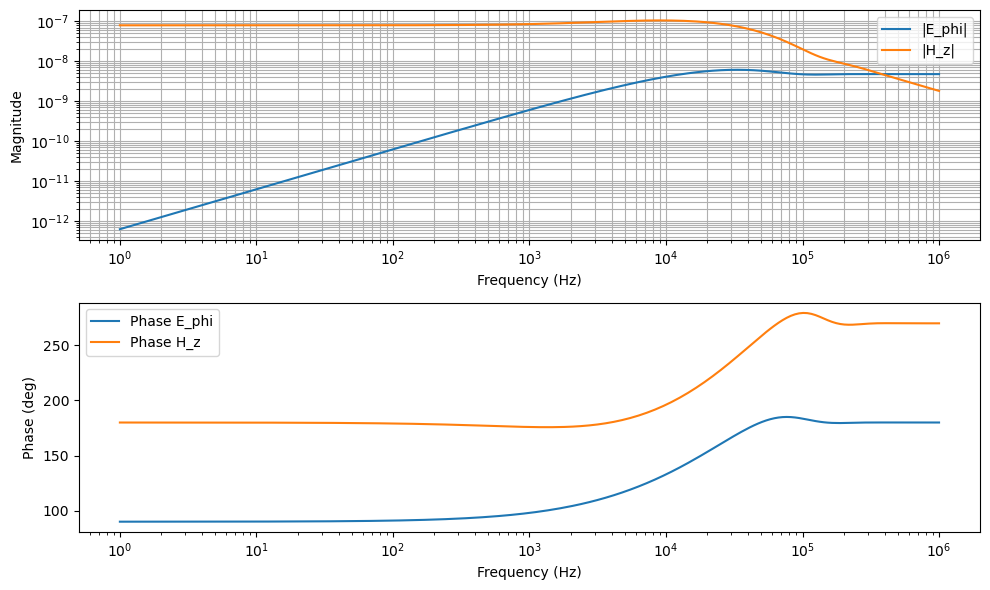

In [12]:
import numpy as np
import matplotlib.pyplot as plt

m = 1.0
rho = 100.0
sigma = 0.01
mu0 = 4*np.pi*1e-7

freqs = np.logspace(0, 6, 200)
omega = 2*np.pi*freqs
k = np.sqrt(1j * omega * mu0 * sigma)
k = np.where(np.imag(k) > 0, -k, k)
Ephi = (-m/(2*np.pi*rho**4)) * (3 - (3 + 3j*k*rho - (k*rho)**2)*np.exp(-1j*k*rho))
Hz = (m/(2*np.pi*k**2*rho**5)) * (9 - (9 + 9j*k*rho - 4*(k*rho)**2 - 1j*(k*rho)**3)*np.exp(-1j*k*rho))
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.loglog(freqs, np.abs(Ephi), label="|E_phi|")
plt.loglog(freqs, np.abs(Hz), label="|H_z|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True, which="both")
plt.subplot(2,1,2)
phase_E = np.unwrap(np.angle(Ephi)) * 180/np.pi
phase_H = np.unwrap(np.angle(Hz)) * 180/np.pi
plt.semilogx(freqs, phase_E, label="Phase E_phi")
plt.semilogx(freqs, phase_H, label="Phase H_z")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.legend()
plt.tight_layout()
plt.show()



At low frequencies ($<1$ kHz), the vertical magnetic field $|H_z|$ dominates and remains nearly constant while the azimuthal electric field $|E_\phi|$ is very weak and phase-shifted by about $90^\circ$, reflecting a diffusion-controlled regime. As frequency increases ($10^3$–$10^4$ Hz), $|E_\phi|$ rises and peaks while $|H_z|$ stays nearly flat, indicating strong inductive coupling; the phases of both fields begin to shift, marking the transition toward wave-like behavior. At high frequencies ($>10^5$ Hz), both fields decay in magnitude due to reduced skin depth in the conductive half-space, with phases approaching $\sim 180^\circ$ for $E_\phi$ and $\sim 270^\circ$ for $H_z$. This behavior is consistent with electromagnetic induction in a conducting Earth: diffusion at low frequency, peak response at intermediate frequency, and strong attenuation at high frequency.


# Calculating the surface reflection coefficients for TE and TM plane waves incident on a layered Earth (Eqs. 4.20–4.26)

This section implements and explains the standard bottom-up recursion to compute the **surface reflection coefficients** for TE and TM plane waves incident on a layered Earth.  
These are the formulas in Ward & Hohmann (chapter 4): Eqs. (4.20)–(4.26) (plus supporting definitions (4.27)–(4.30)).

---

## Key Equations

**TM reflection coefficient at the surface**

$$
r_{TM} = \frac{Z_0 - \widehat{Z}_1}{Z_0 + \widehat{Z}_1}
\tag{4.20}
$$

**TE reflection coefficient at the surface**

$$
r_{TE} = \frac{Y_0 - \widehat{Y}_1}{Y_0 + \widehat{Y}_1}
\tag{4.19}
$$

Free-space reference quantities (using hats for the frequency-domain multipliers):

$$
\hat{z}_0 = i\omega\mu_0, \qquad \hat{y}_0 = i\omega\epsilon_0
$$

$$
Y_0 = \frac{\mu_0}{\hat{z}_0}, \qquad Z_0 = \frac{\mu_0}{\hat{y}_0}
$$

Layer quantities (for layer $n$):

$$
k_n^2 = \omega^2 \mu_n \epsilon_n - i\omega \mu_n \sigma_n
\tag{4.30}
$$

$$
u_n = \sqrt{\lambda^2 - k_n^2}
\tag{4.29}
$$

$$
Y_n = \frac{u_n}{\hat{z}_n}, \qquad Z_n = \frac{u_n}{\hat{y}_n}
\tag{4.27–4.28}
$$

with $\hat{z}_n = i\omega\mu_n$ and $\hat{y}_n = i\omega\epsilon_n + \sigma_n$.

---

## Bottom-Up Recursion

Start from the deepest layer and move upward:

$$
\widehat{Y}_N = Y_N, \qquad
\widehat{Y}_n = Y_n \, \frac{\widehat{Y}_{n+1} + Y_n \tanh(u_n h_n)}{Y_n + \widehat{Y}_{n+1}\tanh(u_n h_n)}
\tag{4.25}
$$

and similarly for $\widehat{Z}_n$:

$$
\widehat{Z}_N = Z_N, \qquad
\widehat{Z}_n = Z_n \, \frac{\widehat{Z}_{n+1} + Z_n \tanh(u_n h_n)}{Z_n + \widehat{Z}_{n+1}\tanh(u_n h_n)}
\tag{4.26}
$$

Finally plug $\widehat{Y}_1, \widehat{Z}_1$ into $r_{TE}, r_{TM}$.

---

## Algorithm 

1. Choose angular frequency $\omega = 2\pi f$ and a horizontal wavenumber $\lambda$ (or an array of $\lambda$ values).  
2. For each layer $n$ (with thickness $h_n$, conductivity $\sigma_n$, relative permittivity $\epsilon_{r,n}$, relative permeability $\mu_{r,n}$):
   - Compute $\epsilon_n = \epsilon_{r,n}\,\epsilon_0$, $\mu_n = \mu_{r,n}\,\mu_0$.
   - Compute $k_n^2 = \omega^2\mu_n\epsilon_n - i\omega\mu_n\sigma_n$.
   - Compute $u_n = \sqrt{\lambda^2 - k_n^2}$ — choose the branch so that fields decay away from the source (enforce $\mathrm{Re}(u_n) \geq 0$).
   - Compute $Y_n = u_n / \hat{z}_n$ and $Z_n = u_n / \hat{y}_n$, where $\hat{z}_n = i\omega\mu_n$, $\hat{y}_n = i\omega\epsilon_n + \sigma_n$.
3. Start recursion: set $\widehat{Y}_{N} = Y_N$ and $\widehat{Z}_{N} = Z_N$.
4. For layers $n = N-1 \rightarrow 1$: update
   $$
   \widehat{Y}_n = Y_n \frac{\widehat{Y}_{n+1} + Y_n\tanh(u_n h_n)}{Y_n + \widehat{Y}_{n+1}\tanh(u_n h_n)}.
   $$
   (and similarly for $\widehat{Z}_n$).
   - **Stability tip**: when $u_n h_n$ is large, $\tanh(u_n h_n)\to 1$ and cancellation/loss of precision can occur. In that case compute $\tanh$ via
     $$
     \tanh(u h) = \frac{1 - e^{-2 u h}}{1 + e^{-2 u h}}
     $$
     or directly use the algebraic exponential form.
5. Compute $r_{TE}$ and $r_{TM}$ using the surface $\widehat{Y}_1, \widehat{Z}_1$.


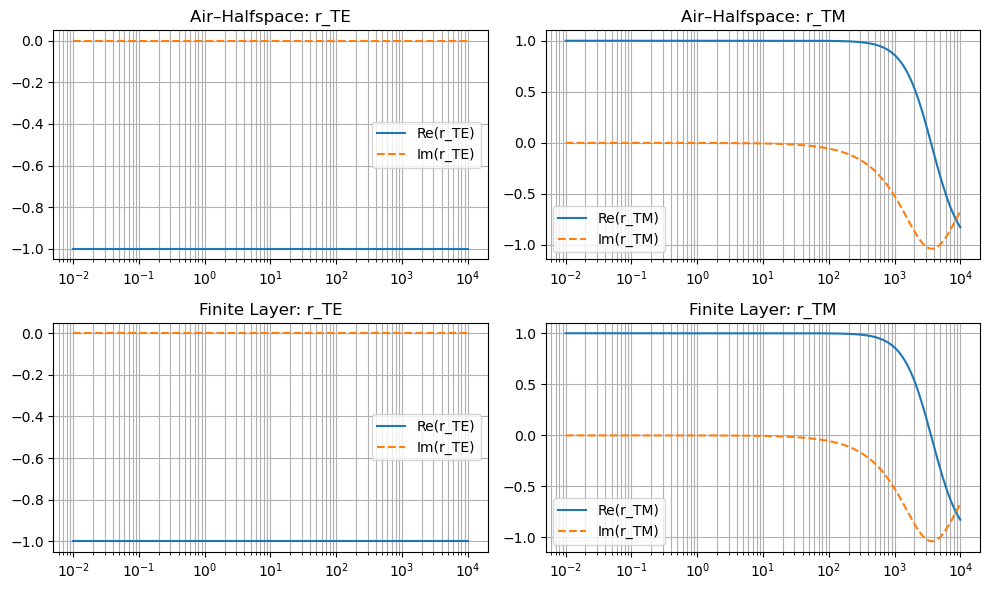

In [10]:
import numpy as np
import matplotlib.pyplot as plt
mu0 = 4.0 * np.pi * 1e-7       # H/m
eps0 = 8.854187817e-12         # F/m

def reflection_coefficients(lambda_vals, freq, thicknesses, sigma_layers, epsr_layers, mur_layers, use_exp=False):
    """
    Compute r_TE and r_TM for layered earth (Ward & Hohmann, Ch. 4).
    Implements Eqs. (4.20–4.26).
    """
    omega = 2.0 * np.pi * freq
    N = len(sigma_layers)

    sigma = np.array(sigma_layers, dtype=complex)
    eps   = np.array(epsr_layers, dtype=float) * eps0
    mu    = np.array(mur_layers, dtype=float) * mu0
    hat_z = 1j * omega * mu
    hat_y = 1j * omega * eps + sigma

    lambda_vals = np.atleast_1d(lambda_vals)
    rTE = np.zeros_like(lambda_vals, dtype=complex)
    rTM = np.zeros_like(lambda_vals, dtype=complex)

    for idx, lam in enumerate(lambda_vals):
        k2 = omega**2 * mu * eps - 1j * omega * mu * sigma
        u  = np.sqrt(lam**2 - k2)
        u  = np.where(np.real(u) < 0, -u, u)

        Y = u / hat_z   # TE admittance
        Z = u / hat_y   # TM impedance

        # Initialize with bottom half-space
        hatY, hatZ = Y[-1], Z[-1]

        # Bottom-up recursion through finite layers
        if len(thicknesses) > 0:
            for n in range(N-2, -1, -1):
                un, Yn, Zn, hn = u[n], Y[n], Z[n], thicknesses[n]
                if use_exp:
                    s = np.exp(-2.0 * un * hn)
                    th = (1.0 - s) / (1.0 + s)
                else:
                    th = np.tanh(un * hn)

                hatY = Yn * (hatY + Yn * th) / (Yn + hatY * th)
                hatZ = Zn * (hatZ + Zn * th) / (Zn + hatZ * th)

        # Free-space reference admittance/impedance
        Y0 = mu0 / (1j * omega * mu0)
        Z0 = mu0 / (1j * omega * eps0)

        # Reflection coefficients
        rTE[idx] = (Y0 - hatY) / (Y0 + hatY)
        rTM[idx] = (Z0 - hatZ) / (Z0 + hatZ)

    return rTE, rTM

lambda0 = 2.0 * np.pi / 100.0        # horizontal wavenumber ~100 m wavelength
freqs = np.logspace(-2, 4, 200)      # 0.01 Hz – 10 kHz

thicknesses   = []                   # no finite layers
sigma_layers  = [1e-12, 1/100.0]     # air, half-space σ = 0.01 S/m (100 Ω·m)
epsr_layers   = [1.0, 1.0]
mur_layers    = [1.0, 1.0]

rTE_A, rTM_A = [], []
for f in freqs:
    rTE, rTM = reflection_coefficients(lambda0, f, thicknesses, sigma_layers, epsr_layers, mur_layers, use_exp=True)
    rTE_A.append(rTE[0]); rTM_A.append(rTM[0])
rTE_A, rTM_A = np.array(rTE_A), np.array(rTM_A)

thicknesses   = [10.0]                # 10 m top layer
sigma_layers  = [0.01, 1/100.0]       # top: 100 Ω·m, bottom: 100 Ω·m
epsr_layers   = [1.0, 1.0]
mur_layers    = [1.0, 1.0]

rTE_B, rTM_B = [], []
for f in freqs:
    rTE, rTM = reflection_coefficients(lambda0, f, thicknesses, sigma_layers, epsr_layers, mur_layers, use_exp=True)
    rTE_B.append(rTE[0]); rTM_B.append(rTM[0])
rTE_B, rTM_B = np.array(rTE_B), np.array(rTM_B)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.semilogx(freqs, rTE_A.real, label='Re(r_TE)')
plt.semilogx(freqs, rTE_A.imag, '--', label='Im(r_TE)')
plt.title('Air–Halfspace: r_TE'); plt.grid(True, which='both'); plt.legend()

plt.subplot(2,2,2)
plt.semilogx(freqs, rTM_A.real, label='Re(r_TM)')
plt.semilogx(freqs, rTM_A.imag, '--', label='Im(r_TM)')
plt.title('Air–Halfspace: r_TM'); plt.grid(True, which='both'); plt.legend()

plt.subplot(2,2,3)
plt.semilogx(freqs, rTE_B.real, label='Re(r_TE)')
plt.semilogx(freqs, rTE_B.imag, '--', label='Im(r_TE)')
plt.title('Finite Layer: r_TE'); plt.grid(True, which='both'); plt.legend()

plt.subplot(2,2,4)
plt.semilogx(freqs, rTM_B.real, label='Re(r_TM)')
plt.semilogx(freqs, rTM_B.imag, '--', label='Im(r_TM)')
plt.title('Finite Layer: r_TM'); plt.grid(True, which='both'); plt.legend()
plt.tight_layout()
plt.show()



### Step-off and Impulse Responses of a Vertical Magnetic Dipole

From **Ward & Hohmann (1988)**, the horizontal magnetic field of a vertical magnetic dipole
above a homogeneous half-space is expressed as follows.

---

**Step-off response (general expression):**

$$
h_p(t) = - \frac{m \, \theta^2}{2 \pi p} 
\exp\!\left(-\tfrac{1}{2} \theta^2 p^2\right)
\left[ I_1\!\left(\tfrac{1}{2} \theta^2 p^2\right) - I_2\!\left(\tfrac{1}{2} \theta^2 p^2\right) \right]
\tag{4.72}
$$

where:

- $m$ = dipole moment (A·m$^2$)  
- $\theta$ = dimensionless geometry factor  
- $p^2 = \dfrac{\mu_0 \sigma r^2}{4 t}$ = diffusion parameter  
- $I_\nu$ = modified Bessel function of the first kind  
- $r$ = horizontal offset (m)  
- $t$ = time (s)  
- $\sigma$ = conductivity (S/m)  
- $\mu_0$ = permeability of free space  

---

**Late-time asymptotic behavior:**

$$
h_p(t) \;\approx\; - \frac{m \, \mu_0 \, \sigma^2}{128 \pi \, t^2}
\tag{4.73}
$$

---

**Impulse response (time derivative of step-off):**

$$
\frac{\partial h_p}{\partial t} = 
\frac{m \, \theta^2}{2 \pi \, p \, t}
\exp\!\left(-\tfrac{1}{2} \theta^2 p^2\right)
\left[
\big( 1 + \theta^2 p^2 \big) I_0\!\left(\tfrac{1}{2} \theta^2 p^2\right)
-\left( 2 + \theta^2 p^2 + \tfrac{4}{\theta^2 p^2} \right) I_1\!\left(\tfrac{1}{2} \theta^2 p^2\right)
\right]
\tag{4.74}
$$

---

**Impulse response at late time:**

$$
\frac{\partial h_p}{\partial t} \;\approx\; \frac{m \, \mu_0 \, \sigma^2}{64 \pi \, t^3}
\tag{4.75}
$$


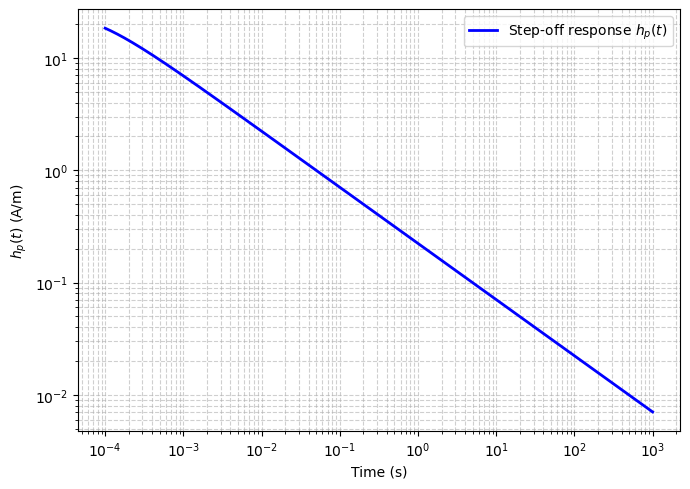

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv  # Modified Bessel function of the first kind

def step_off_response(t, m=1000.0, sigma=1/100.0, r=100.0, theta=1.0):

    mu0 = 4 * np.pi * 1e-7  # magnetic permeability of free space
    
    t = np.asarray(t, dtype=float)
    hp = np.zeros_like(t)
    
    # avoid division by zero
    mask = t > 0
    if np.any(mask):
        # diffusion parameter
        p = r * np.sqrt(mu0 * sigma / (4.0 * t[mask]))
        
        # Bessel argument
        X = 0.5 * theta**2 * p**2
        
        # Ward & Hohmann eq. (4.72)
        hp[mask] = -(m * theta**2) / (2.0 * np.pi * p) * np.exp(-0.5 * theta**2 * p**2) * (iv(1, X) - iv(2, X))
    
    return hp


# ---------------- MAIN ----------------
if __name__ == "__main__":
    # time samples: 0.1 ms – 1000 s
    t = np.logspace(-4, 3, 400)
    
    # compute response
    hp = step_off_response(t, m=1000.0, sigma=0.01, r=100.0, theta=1.0)
    
    # ---- Plot ----
    plt.figure(figsize=(7,5))
    plt.loglog(t, np.abs(hp), 'b-', lw=2, label="Step-off response $h_p(t)$")
    
    plt.xlabel("Time (s)")
    plt.ylabel("$h_p(t)$ (A/m)")
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
